## Project Outline
#### Objective: Analyze the Champions League Finals data from 1955 to 2023 
#### Data Source: UCL_Finals_1955-2023.csv (containing details of each final match from Kaggle).

In [7]:
# Importing required library
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [8]:
# Import warnings module to ignore warnings
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [9]:
# Load Data
df = pd.read_csv('UCL_Finals_1955-2023.csv')

# show first 5 row of dataframe
df.head(5)

,Season,Country,Winners,Score,Runners-up,Country.1,Venue,Attend­ance,Notes
0,1955–56,Spain,Real Madrid,4–3,Reims,France,"Parc des Princes, Paris, France","38,239",NaN
1,1956–57,Spain,Real Madrid,2–0,Fiorentina,Italy,"Santiago Bernabéu, Madrid, Spain","124,000",NaN
2,1957–58,Spain,Real Madrid,3–2,AC Milan,Italy,"Heysel Stadium, Brussels, Belgium","67,000",Match was won during extra time
3,1958–59,Spain,Real Madrid,2–0,Reims,France,"Neckarstadion, Stuttgart, West Germany","72,000",NaN
4,1959–60,Spain,Real Madrid,7–3,Eintracht Frankfurt,West Germany,"Hampden Park, Glasgow, Scotland","127,621",NaN


In [10]:
df['Notes'].unique()

array([nan, 'Match was won during extra time',
       'Match was won after a replay',
       'Match was won on a penalty shoot-out'], dtype=object)

## Data Preparation

In [11]:
# Rename columns for clarity
df.rename(columns={'Country': 'Winner_Country', 'Country.1': 'Runner_up_Country','Notes':'Remarks','Attend­ance': 'Attendance'}, inplace=True)
df.head(3)

,Season,Winner_Country,Winners,Score,Runners-up,Runner_up_Country,Venue,Attendance,Remarks
0,1955–56,Spain,Real Madrid,4–3,Reims,France,"Parc des Princes, Paris, France","38,239",NaN
1,1956–57,Spain,Real Madrid,2–0,Fiorentina,Italy,"Santiago Bernabéu, Madrid, Spain","124,000",NaN
2,1957–58,Spain,Real Madrid,3–2,AC Milan,Italy,"Heysel Stadium, Brussels, Belgium","67,000",Match was won during extra time


In [12]:
# Split Score into two columns: Winner_Score and Runner_up_Score
df[['Winner_Score', 'Runner_up_Score']] = df['Score'].str.split('–', expand=True).astype(int)

# compute score difference 
df['Score_Diff'] = abs(df['Winner_Score'] - df['Runner_up_Score']) 

df.head(3)

,Season,Winner_Country,Winners,Score,Runners-up,Runner_up_Country,Venue,Attendance,Remarks,Winner_Score,Runner_up_Score,Score_Diff
0,1955–56,Spain,Real Madrid,4–3,Reims,France,"Parc des Princes, Paris, France","38,239",NaN,4,3,1
1,1956–57,Spain,Real Madrid,2–0,Fiorentina,Italy,"Santiago Bernabéu, Madrid, Spain","124,000",NaN,2,0,2
2,1957–58,Spain,Real Madrid,3–2,AC Milan,Italy,"Heysel Stadium, Brussels, Belgium","67,000",Match was won during extra time,3,2,1


In [13]:
df['Remarks'].fillna('Match was  won during normal time ',inplace = True)
df.head(3)

,Season,Winner_Country,Winners,Score,Runners-up,Runner_up_Country,Venue,Attendance,Remarks,Winner_Score,Runner_up_Score,Score_Diff
0,1955–56,Spain,Real Madrid,4–3,Reims,France,"Parc des Princes, Paris, France","38,239",Match was won during normal time,4,3,1
1,1956–57,Spain,Real Madrid,2–0,Fiorentina,Italy,"Santiago Bernabéu, Madrid, Spain","124,000",Match was won during normal time,2,0,2
2,1957–58,Spain,Real Madrid,3–2,AC Milan,Italy,"Heysel Stadium, Brussels, Belgium","67,000",Match was won during extra time,3,2,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Season             69 non-null     object
 1   Winner_Country     69 non-null     object
 2   Winners            69 non-null     object
 3   Score              69 non-null     object
 4   Runners-up         69 non-null     object
 5   Runner_up_Country  69 non-null     object
 6   Venue              69 non-null     object
 7   Attendance         69 non-null     object
 8   Remarks            69 non-null     object
 9   Winner_Score       69 non-null     int32 
 10  Runner_up_Score    69 non-null     int32 
 11  Score_Diff         69 non-null     int32 
dtypes: int32(3), object(9)
memory usage: 5.8+ KB


In [15]:
# Convert Attendance to numeric format
df['Attendance'] = df['Attendance'].str.replace(',', '').astype(float)

In [16]:
df.head()

,Season,Winner_Country,Winners,Score,Runners-up,Runner_up_Country,Venue,Attendance,Remarks,Winner_Score,Runner_up_Score,Score_Diff
0,1955–56,Spain,Real Madrid,4–3,Reims,France,"Parc des Princes, Paris, France",38239.0,Match was won during normal time,4,3,1
1,1956–57,Spain,Real Madrid,2–0,Fiorentina,Italy,"Santiago Bernabéu, Madrid, Spain",124000.0,Match was won during normal time,2,0,2
2,1957–58,Spain,Real Madrid,3–2,AC Milan,Italy,"Heysel Stadium, Brussels, Belgium",67000.0,Match was won during extra time,3,2,1
3,1958–59,Spain,Real Madrid,2–0,Reims,France,"Neckarstadion, Stuttgart, West Germany",72000.0,Match was won during normal time,2,0,2
4,1959–60,Spain,Real Madrid,7–3,Eintracht Frankfurt,West Germany,"Hampden Park, Glasgow, Scotland",127621.0,Match was won during normal time,7,3,4


# Basic Summary Statistics

In [17]:
# Generate summary statistics of numerical column
summary_stats = df[['Attendance', 'Winner_Score', 'Runner_up_Score']].describe()
summary_stats

,Attendance,Winner_Score,Runner_up_Score
count,69.000000,69.000000,69.000000
mean,63865.869565,2.014493,0.623188
std,20984.344496,1.322795,0.806252
min,0.000000,0.000000,0.000000
25%,53053.000000,1.000000,0.000000
50%,63000.000000,2.000000,0.000000
75%,71942.000000,3.000000,1.000000
max,127621.000000,7.000000,3.000000


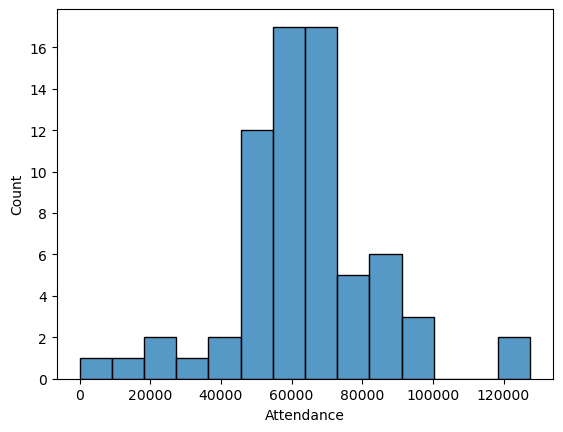

In [67]:
# Plot histograms for each variable to observe distributions.
sns.histplot(data = df, x = 'Attendance')
plt.show()

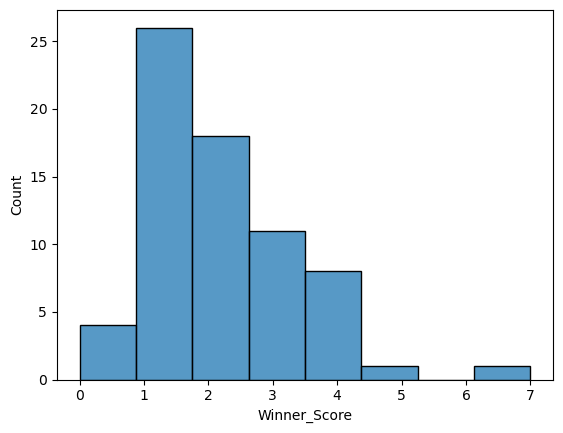

In [35]:
sns.histplot(data = df, x = 'Winner_Score')
plt.show()

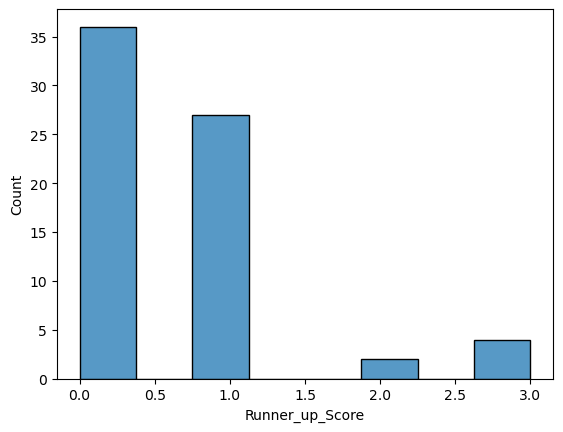

In [36]:
sns.histplot(data = df, x = 'Runner_up_Score')
plt.show()

# Trend Analysis Over Seasons

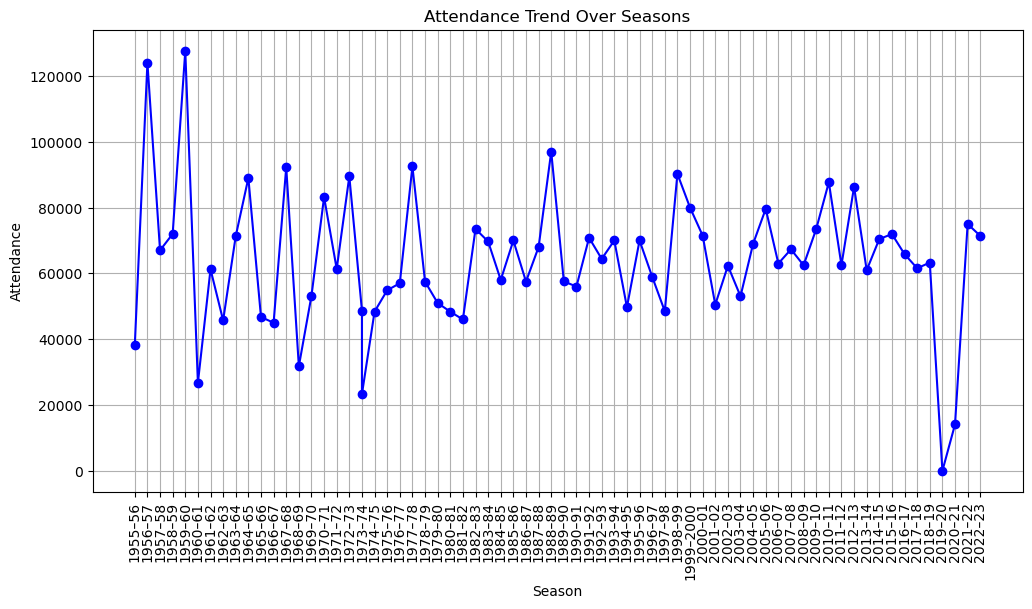

In [44]:
# Plot attendance across seasons
plt.figure(figsize=(12, 6))
plt.plot(df['Season'], df['Attendance'], marker='o',color = 'blue')
plt.xlabel('Season')
plt.ylabel('Attendance')
plt.title('Attendance Trend Over Seasons')
plt.grid()
plt.xticks(rotation=90)
plt.show()

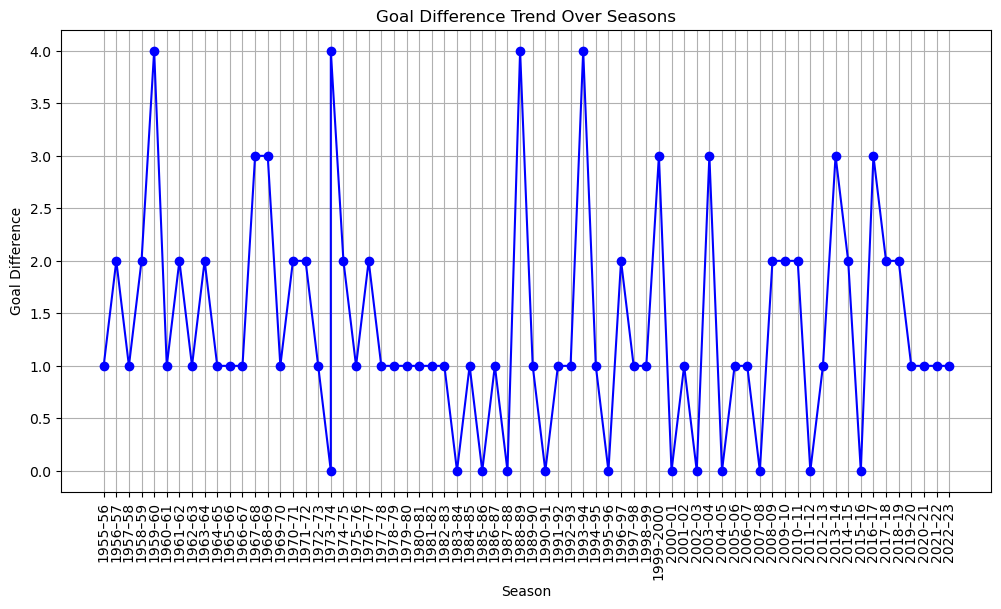

In [51]:
# Goal difference across seasons 
plt.figure(figsize=(12, 6))
plt.plot(df['Season'], df['Score_Diff'], marker='o',color = 'blue')
plt.xlabel('Season')
plt.ylabel('Goal Difference')
plt.title('Goal Difference Trend Over Seasons')
plt.grid()
plt.xticks(rotation=90)
plt.show()

# Winning Team and Country Analysis

In [55]:
# Identify historically dominant teams and countries in UCL finals

team_wins = df['Winners'].value_counts()
country_wins = df['Winner_Country'].value_counts()


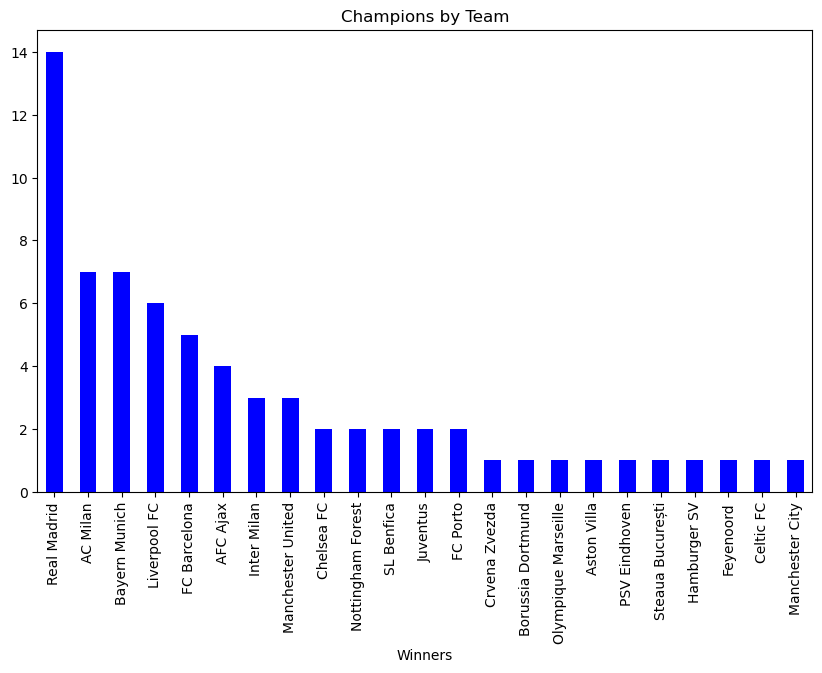

In [59]:
# DOminant team
team_wins.plot(kind='bar', figsize=(10, 6), title='Champions by Team',color = 'blue')
plt.show()

<Axes: title={'center': 'Champions by Country'}, xlabel='Winner_Country'>

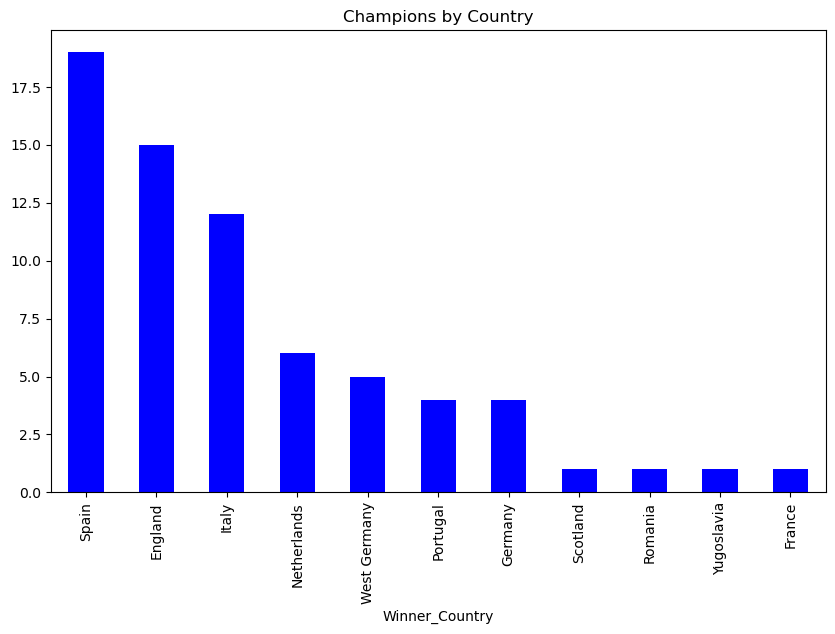

In [58]:
# Dominant country 
country_wins.plot(kind='bar',figsize=(10, 6),title='Champions by Country',color = 'blue')

# Teams with most final appearance

Team with most final appearances: Real Madrid (17.0 appearances)


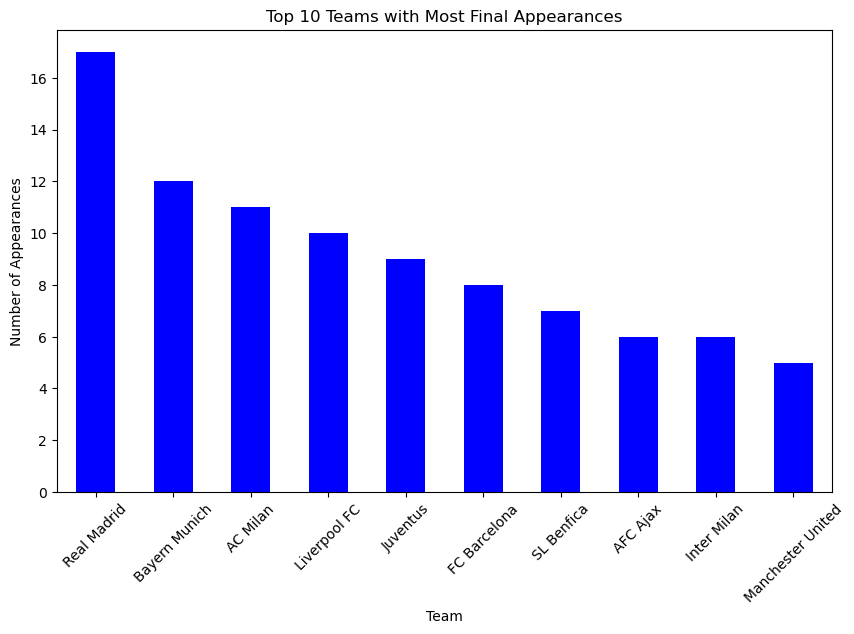

In [63]:
# Calculate total appearances in finals for each team 
appearances = df['Winners'].value_counts() + df['Runners-up'].value_counts()
appearances = appearances.sort_values(ascending=False)

# Find the team with the most final appearances
most_appearances_team = appearances.idxmax()
most_appearances_count = appearances.max()
print(f"Team with most final appearances: {most_appearances_team} ({most_appearances_count} appearances)")

# Visualize teams with the most final appearances
plt.figure(figsize=(10, 6))
appearances.head(10).plot(kind='bar', color='blue')
plt.title("Top 10 Teams with Most Final Appearances")
plt.xlabel("Team")
plt.ylabel("Number of Appearances")
plt.xticks(rotation=45)
plt.show()


# Teams with most losses

Team with most final losses: Juventus (7 losses)


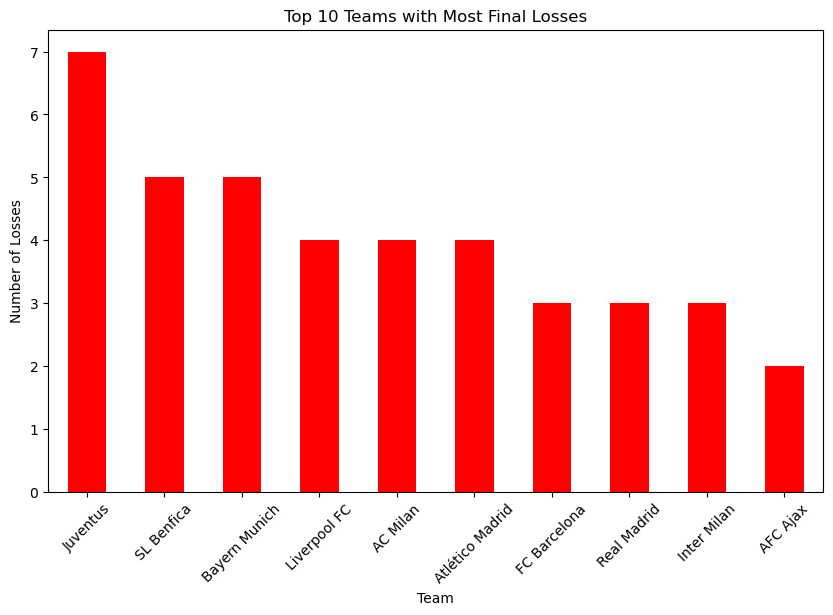

In [64]:
# Calculate total losses in finals for each team (counting only the Runners-up column)
losses = df['Runners-up'].value_counts()
losses = losses.sort_values(ascending=False)

# Find the team with the most final losses
most_losses_team = losses.idxmax()
most_losses_count = losses.max()
print(f"Team with most final losses: {most_losses_team} ({most_losses_count} losses)")

# Visualize teams with the most final losses
plt.figure(figsize=(10, 6))
losses.head(10).plot(kind='bar', color='red')
plt.title("Top 10 Teams with Most Final Losses")
plt.xlabel("Team")
plt.ylabel("Number of Losses")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Visualize score difference to analyze the competitiveness of UCL finals

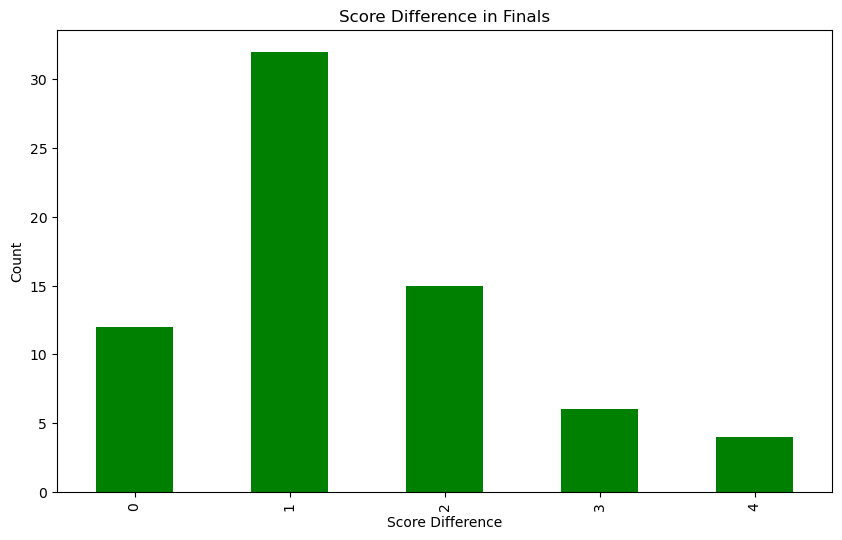

In [71]:
df['Score_Diff'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6),color = 'green', title='Score Difference in Finals')
plt.xlabel('Score Difference')
plt.ylabel('Count')
plt.show()

# Explore popular venues and countries for hosting UCL finals.

Text(0, 0.5, 'Attendance')

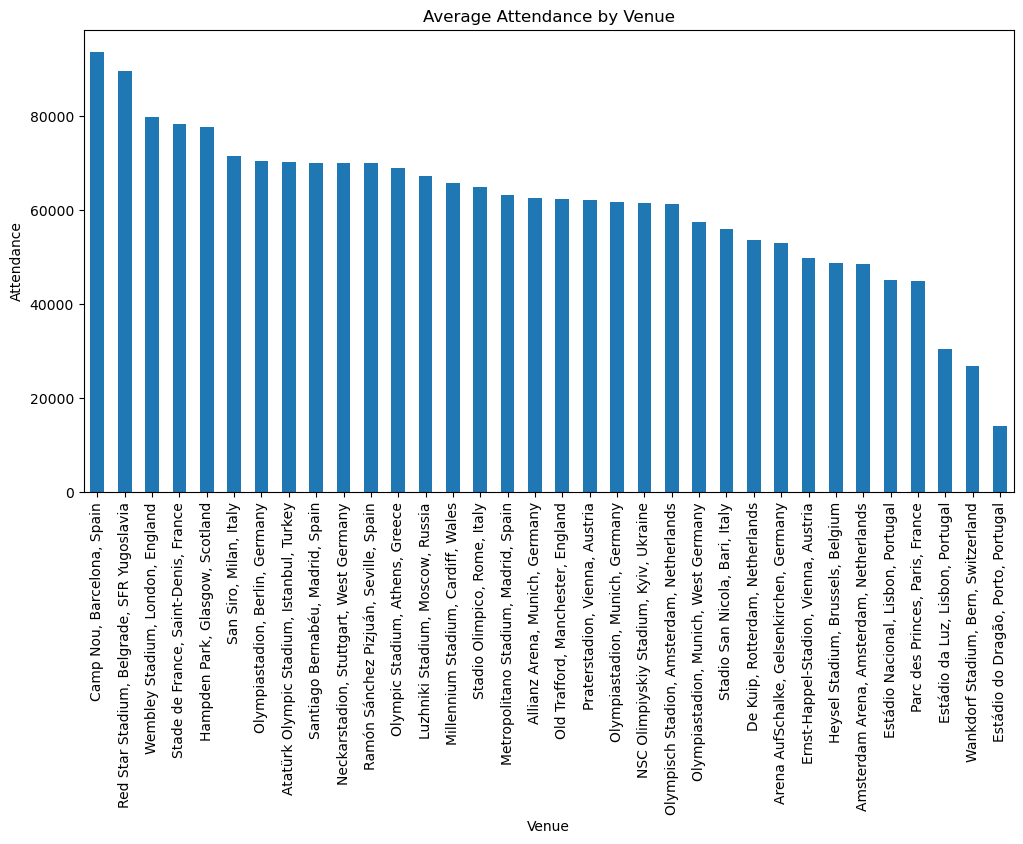

In [73]:
venue_attendance = df.groupby('Venue')['Attendance'].mean().sort_values(ascending=False)
venue_attendance.plot(kind='bar', figsize=(12, 6), title='Average Attendance by Venue')
plt.xlabel('Venue')
plt.ylabel('Attendance')


# Analysis of Finals With Types of Win 

<Axes: title={'center': 'Finals With Types of Win'}, ylabel='count'>

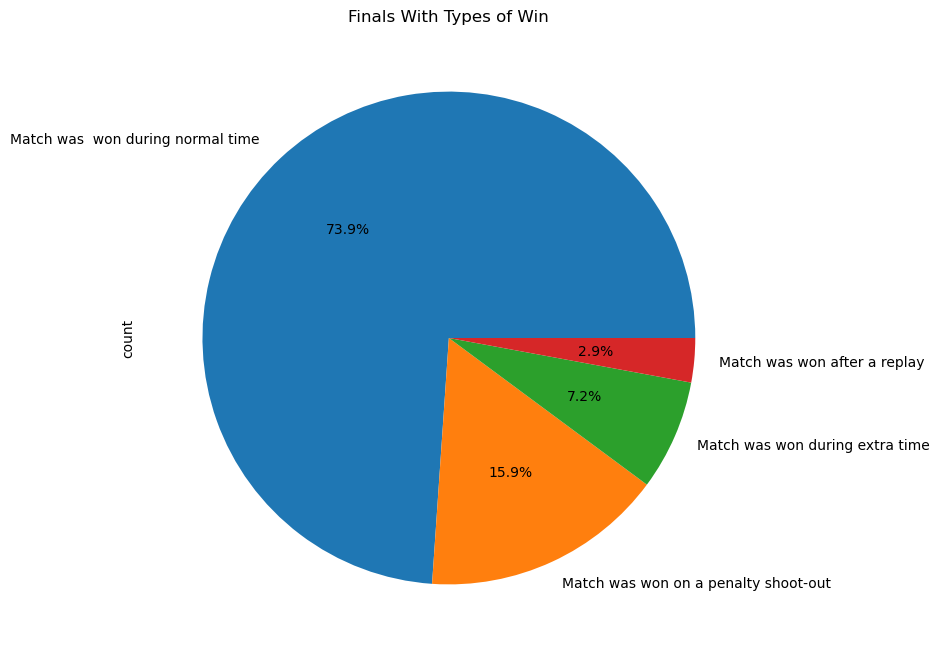

In [80]:
remarks_counts = df['Remarks'].value_counts()
remarks_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Finals With Types of Win')

### Detailed Summary of UEFA Champions League Finals EDA

1. **Dataset Overview**: The dataset covers UEFA Champions League Finals from 1955 to 2023, featuring 68 years of match records. It includes information on the finalist teams, scores, winning margins, venues, cities, countries, and attendance figures.

2. **Most Dominant Teams**:
   - **Most Final Appearances**: Real Madrid tops the chart with 17 final appearances, closely followed by AC Milan and Bayern Munich.
   - **Most Wins**: Real Madrid has the most victories, clinching 14 Champions League titles.
   - **Most Final Losses**: Teams like Juventus stand out for having the highest number of losses, with notable mentions for AC Milan and Bayern Munich.

3. **Top Host Cities and Countries**:
   - **Most Frequent Host Cities**: Madrid, London, and Paris emerge as the cities with the highest number of final games hosted, highlighting Europe’s football capitals.
   - **Countries with Most Finals**: Spain, England, and Italy lead in hosting Champions League finals, with Spain accounting for a significant portion.

4. **Winning Margins and Scores**:
   - **Highest Winning Margins**: Analysis of the score differentials shows several finals with large winning margins, but the majority fall within a single-goal margin, emphasizing the competitive nature of these games.
   - **Popular Scores**: The most common scoreline observed in the finals is 1-0, indicating closely contested matches.

5. **Types of Wins**:
   - **Normal Time Wins**: A significant portion of the finals ended in normal time, showcasing decisive victories within the 90-minute regulation.
   - **Extra Time and Penalty Wins**: Finals extending into extra time and penalties reflect the high-stakes tension, with several notable wins achieved only after additional play or penalty shootouts. This type of win highlights the evenly matched nature of the competing teams in these instances.

6. **Attendance Records**:
   - **Highest Attendance**: The highest attendance recorded was over 120,000 spectators, with an average final attendance ranging between 60,000 and 80,000, showcasing the tournament’s vast popularity.
   - **Trends Over Time**: Attendance figures vary significantly by venue size and era, with newer stadiums typically accommodating fewer fans due to stricter safety regulations.

7. **Chronological Trends and Patterns**:
   - **Decade-wise Dominance**: Each decade has seen shifts in dominant teams. Real Madrid dominated the 1950s and early 2000s, while AC Milan and Bayern Munich made their mark in the 1990s and 1970s, respectively.
   - **Competition Evolution**: Analyzing finals across years reveals growing diversity in participating teams, indicating an evolving competitive landscape within European football.

8. **Visualization Insights**:
   - **Bar Charts**: Detailed bar charts illustrate top teams by wins, losses, and appearances, showing their consistent dominance over decades.
   - **Geographical Heatmaps**: Maps visualize the geographical distribution of finals, with Europe as the primary host continent, particularly concentrated in Western European cities.
   - **Score Distribution Plots**: These charts provide insights into the frequency of different winning scores, showing a preference for defensive, close-score games.
nalyzing finals across
